# A1.3 Regresión lineal múltiple
## Luis Enrique Garcia Gallegos
### Matricula: 649247
Después de haber trabajado con la regresión lineal simple, es momento de tomar un reto mayor, pero a la vez, mucho más adecuado para problemas reales: la regresión lineal múltiple. En esta ocasión practicarás con una base de datos de la NASA, con la que trabajaron para tratar de determinar perfiles aerodinámicos ideales ante distintas condiciones, como: la velocidad del viento y ángulo de ataque del mismo. 
Utilizaremos el archivo de nombre `NASA.csv`, donde podrás encontrar información para 1,052 observaciones distintas, con 6 mediciones para cada una de ellas. Los datos se descargaron del __[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise)__, y originalmente se publicaron en el __[NASA Reference Publication 1218](https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf)__.
La base de datos cuenta con la siguiente información: 
* `frecuencia`. Frecuencia, en **Hz**. 
* `angulo`. Ángulo de ataque, en **grados**. 
* `longitud`. Longitud de cuerda geométrica, en **metros**.
* `velocidad`. Velocidad de flujo libre, en **metros por segundo**. 
* `espesor`. Espesor del desplazamiento en el lado de succión, en **metros**. 
* `presion`. Nivel escalado de presión sonora, en **dB**. 

Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 
1. Importa los datos del archivo `NASA.csv` a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Revisa las dimensiones del *data frame* e imprime en consola tanto dichas dimensiones como las primeras **15** filas de datos. 

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
from math import sqrt
datos=ps.read_csv('NASA.csv')
print("Dimensiones de los datos: ",datos.shape, "\nNombres de las variables: ", datos.columns)
datos.head(15)

Dimensiones de los datos:  (1503, 6) 
Nombres de las variables:  Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


2. Separa el *data frame* en datos de entrenamiento y datos de prueba con una proporción **70/30**. Es decir, el *70%* de los datos se usarán para entrenar el modelo y el resto para validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica simplemente tomar las primeras observaciones para entrenar y las últimas para probar. Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de datos original.

In [2]:
caliz=datos.sample(frac=0.7)
prueba=datos.drop(caliz.index)
nC=caliz.shape[0]
mC=caliz.shape[1]
nP=prueba.shape[0]
mP=prueba.shape[1]
print("Datos de entrenamiento: ", caliz.shape, "\tDatos de prueba: ",prueba.shape, "\nTotal de datos: ", (nC+nP))

Datos de entrenamiento:  (1052, 6) 	Datos de prueba:  (451, 6) 
Total de datos:  1503


No se usaron todos los datos ya que tendríamos que saber que tan bueno es nuestro modelo, por lo que si le volvíamos a dar los mismos datos que se usaron para entrenar unicamente lograríamos que acertara en las predicciones.

3. Entrena un modelo de regresión lineal múltiple, para que las primeras **5** variables del sistema intenten predecir a la sexta, `presion`. Es decir, nos interesa tratar de predecir el aerodinamismo, medido como la presión sonora detectada. Imprime en pantalla un resumen del modelo, donde se muestre claramente el coeficiente estimado de cada 
variable, así como su `p-value` asociado, entre otras cosas. Es probable que los *p-values* se vean como **0.000**, en ese caso, imprimir manualmente los valores exactos de dichas métricas (recuerda el atributo `pvalues`).

In [3]:
XC=caliz.drop('presion', axis=1)
YC=caliz.presion
modeloC=sm.OLS(YC, sm.add_constant(XC))
resultados=modeloC.fit()
resumen=resultados.summary()
print(resumen)
pvalues= resultados.pvalues
print("\n\tp-values\n",pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          6.13e-154
Time:                        08:34:19   Log-Likelihood:                -3155.6
No. Observations:                1052   AIC:                             6323.
Df Residuals:                    1046   BIC:                             6353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7311      0.673    197.349      0.0

Como se puede observar los `p-values` son muy pequeños y al hacer un redondeo o truncamiento a **3** decimales estos se transforman en **0.000**.

4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos una variable significativa en el modelo. Adicionalmente, indica específicamente cuál o cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál considerarías que es la variable más importante del modelo. Imprime en consola cada una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás basando para llegar a cada conclusión.

In [4]:
print("Variable significativa\nconst\tespesor\n")
print("Variable no significativa\nfrecuencia\tvelocidad")
#   Me baso en los p-values debido a que tan grandes o pequeños son entre ellos,
#   sin embargo para la variable const supongo que tiene una fuerte relación debido a que es cero.

Variable significativa
const	espesor

Variable no significativa
frecuencia	velocidad


5. Calcula el *residual standard error* y la 𝑅$^2$ del modelo, tanto para los datos de entrenamiento como para los datos de validación e imprime dichos valores en la consola. Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar los atributos `scale` (y sacar la raíz cuadrada) y `rsquared`.

In [5]:
ySombreroC=resultados.predict(sm.add_constant(XC))
yMeanC=np.mean(YC)
essC=sum((ySombreroC-yMeanC)**2)
emsC=essC/mC
rssC=sum((YC-yMeanC)**2)
rmsC=rssC/(nC-mC-1)
funC=emsC/rmsC
pvalueC=st.f.sf(funC, mC, (nC-mC-1))
XP=prueba.drop('presion', axis = 1)
ySombreroP=resultados.predict(sm.add_constant(XP))
YP=prueba.presion
rssP=sum((YP-ySombreroP)**2)
tssP=sum((YP-np.mean(YP))**2)
rseP=sqrt(rssP/(nP-mP-1))
r2P=1-rssP/tssP
print(f"RSS de entrenamiento: {round(rssC, 4)}\nR^2 de entrenamiento: {round(resultados.rsquared, 4)}\n")
print(f"RSS de prueba: {round(rssP, 4)}\nR^2 de prueba: {round(r2P, 4)}")

RSS de entrenamiento: 49498.0052
R^2 de entrenamiento: 0.4984

RSS de prueba: 9844.8598
R^2 de prueba: 0.5521


El `RSS` bajo significativamente entre el entrenamiento y la prueba, por lo que se puede intuir que logra ajustarse de mejor manera, y esto se puede reafirmar viendo el 𝑅$^2$, en el cual cambio poco.

6. Finalmente, tratemos de visualizar los resultados obtenidos. Genera una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos de validación en el eje **x**, y que cuente con el valor estimado de **Y**, de acuerdo al modelo, para el mismo conjunto de datos en el eje **y**. Idealmente, si el modelo fuera perfecto, se tendría una línea recta con una pendiente de **1** ***(45 grados)***, pues el valor real y el valor estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los resultados obtenidos.

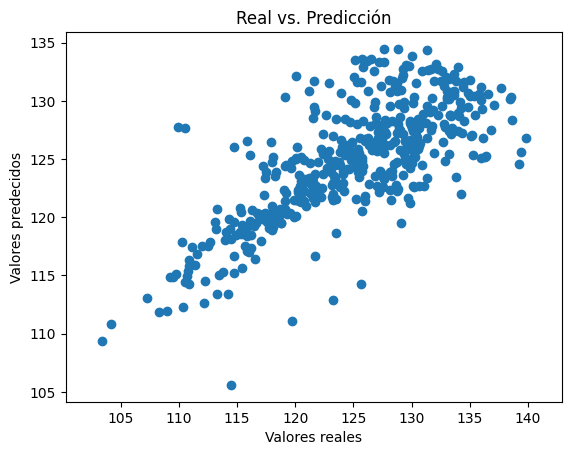

In [6]:
plt.scatter(YP, ySombreroP)
plt.title('Real vs. Predicción')
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.axis('equal')
plt.show()

Como lo había mencionado, antes pues vemos que si comparamos las predicciones con los valores reales podemos ver una tendencia a acercarse o aproximarse a lo real.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica